<a href="https://colab.research.google.com/github/MariaPetrovskaya/Data-Science-demo/blob/main/Car_price_prediction_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Подготовка данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn import metrics
import lightgbm as ltb
from sklearn.preprocessing import StandardScaler

<b> Результат: </b>загрузка всех библиотек

In [ ]:
df = pd.read_csv('/datasets/autos.csv')
data  = df.copy()
#
print('загрузка и знакомство с данными')
print (data.shape)
print (data.info())
print (data.head())

загрузка и знакомство с данными
(354369, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           3543

<b> Результат: </b>Загружены данные и просмотрена основная информация по датасету. В данных 354369 строки и 16 столбцов, в некоторых столбцах есть пропуски данных 

In [ ]:
print(data.columns)

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'Repaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen'],
      dtype='object')


In [ ]:
data=data.rename(columns={'DateCrawled':'date_crawled', 'Price':'рrice', 'VehicleType':'vehicle_type', 'RegistrationYear':'registration_year', 'Gearbox':'gearbox',
       'Power':'power', 'Model':'model', 'Kilometer':'kilometer', 'RegistrationMonth':'registration_month', 'FuelType':'fuel_type', 'Brand':'brand',
       'Repaired':'repaired', 'DateCreated':'date_created', 'NumberOfPictures':'number_of_pictures', 'PostalCode':'postal_code',
       'LastSeen':'last_seen'
})
print(data.columns)

Index(['date_crawled', 'рrice', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'kilometer', 'registration_month', 'fuel_type',
       'brand', 'repaired', 'date_created', 'number_of_pictures',
       'postal_code', 'last_seen'],
      dtype='object')


<b> Результат: </b>изменено название столбцов на нижний регистр

In [ ]:
print (data.duplicated().sum())

4


проверка на явные дубликаты: выявлено 4

In [ ]:
data = data.drop_duplicates().reset_index(drop=True)
print ('после удаления дубликатов',data.shape)
print (data.info())

после удаления дубликатов (354365, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354365 entries, 0 to 354364
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        354365 non-null  object
 1   рrice               354365 non-null  int64 
 2   vehicle_type        316875 non-null  object
 3   registration_year   354365 non-null  int64 
 4   gearbox             334532 non-null  object
 5   power               354365 non-null  int64 
 6   model               334660 non-null  object
 7   kilometer           354365 non-null  int64 
 8   registration_month  354365 non-null  int64 
 9   fuel_type           321470 non-null  object
 10  brand               354365 non-null  object
 11  repaired            283211 non-null  object
 12  date_created        354365 non-null  object
 13  number_of_pictures  354365 non-null  int64 
 14  postal_code         354365 non-null  int64 
 15  last_seen   

<b> Результат: </b> удалены 4 явных дубликата

In [ ]:
print(data['date_crawled'].value_counts())
print(data['date_crawled'].unique())

2016-03-24 14:49:47    7
2016-03-19 21:49:56    6
2016-03-26 22:57:31    6
2016-03-31 16:50:28    5
2016-03-05 14:44:30    5
                      ..
2016-03-19 20:57:29    1
2016-03-23 20:56:15    1
2016-03-25 17:50:05    1
2016-03-22 11:56:27    1
2016-03-17 03:36:24    1
Name: date_crawled, Length: 271174, dtype: int64
['2016-03-24 11:52:17' '2016-03-24 10:58:45' '2016-03-14 12:52:21' ...
 '2016-03-21 09:50:58' '2016-03-14 17:48:27' '2016-03-19 18:57:12']


<b> Результат: </b> рассмотено содержание столбца 'date_crawled' - дата скачивания анкеты из базы. Для модели цены это не нужный параметр, повторы возможны, оставяляем как есть

In [ ]:
print(data['рrice'].value_counts())
print(data['рrice'].unique())
print('минимальная цена продажи', data['рrice'].min())
print('максимальная цена продажи', data['рrice'].max())
print('средняя цена продажи', data['рrice'].mean())

0        10772
500       5670
1500      5394
1000      4648
1200      4594
         ...  
13180        1
10879        1
2683         1
634          1
8188         1
Name: рrice, Length: 3731, dtype: int64
[  480 18300  9800 ... 12395 18429 10985]
минимальная цена продажи 0
максимальная цена продажи 20000
средняя цена продажи 4416.679830118663


<b> Результат: </b> рассмотено содержание столбца 'рrice' - цена в евро, в модели это будет таргет. Формат подходящий int64. Пропусков нет, но много нулевых значений и сомнительно низких.  

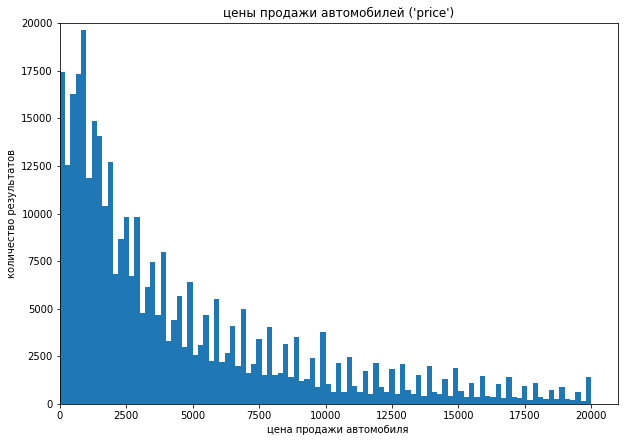

In [ ]:
plt.figure(figsize=[10,7])

plt.hist(data['рrice'], bins=100)

plt.xlim([0, 21000])
plt.ylim([0, 20000])

plt.xlabel("цена продажи автомобиля ")
plt.ylabel("количество результатов")

plt.title("цены продажи автомобилей ('рrice')")
plt.show()

похоже на распределение Пуассона

цена продажи не может быть нулевой по сути сделки. Это аномальные значения, лучше их убрать из датасета

In [ ]:
data = data.drop(data[data['рrice'] == 0].index).reset_index(drop=True)
print ('после удаления рrice=0',data.shape)
print (data.info())



после удаления рrice=0 (343593, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343593 entries, 0 to 343592
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        343593 non-null  object
 1   рrice               343593 non-null  int64 
 2   vehicle_type        309843 non-null  object
 3   registration_year   343593 non-null  int64 
 4   gearbox             326238 non-null  object
 5   power               343593 non-null  int64 
 6   model               326072 non-null  object
 7   kilometer           343593 non-null  int64 
 8   registration_month  343593 non-null  int64 
 9   fuel_type           314134 non-null  object
 10  brand               343593 non-null  object
 11  repaired            277727 non-null  object
 12  date_created        343593 non-null  object
 13  number_of_pictures  343593 non-null  int64 
 14  postal_code         343593 non-null  int64 
 15  last_seen      

<b> Результат: </b> удалены строки с нулевыми значениями в  столбце 'рrice', переустановлена индексация.  

In [ ]:

print(data['registration_year'].unique())
print(data['registration_year'].value_counts())
print('минимальное значение', data['registration_year'].min())
print('максимальное значение', data['registration_year'].max())
print('среднее', data['registration_year'].mean())

[1993 2011 2004 2001 2008 1995 2014 1998 2005 1910 2016 2007 2009 2002
 2018 1997 1990 2017 1981 2003 1994 1991 1984 2006 1999 2012 2010 2000
 1992 2013 1996 1985 1989 2015 1982 1976 1983 1973 1969 1971 1987 1986
 1988 1980 1970 1965 1945 1925 1974 1979 1955 1978 1972 1968 1977 1961
 1966 1975 1963 1964 1960 5000 1958 1967 1959 1956 3200 1000 1941 9999
 8888 1500 2200 4100 1962 1929 1957 1940 3000 2066 1949 2019 1937 1951
 1800 1953 1954 1234 8000 5300 9000 2900 6000 5900 5911 1400 1950 4000
 1948 1952 8500 1932 1255 3700 3800 4800 1942 7000 1935 1933 1936 6500
 1923 2290 1930 1001 9450 1944 2500 1943 1934 1938 1928 5555 5600 1600
 1111 2222 1039 1300 2800 1931 4500 1602 7800 1947 1927 7100 8200 1946]
2000    23072
1999    21994
2005    21524
2006    19679
2001    19653
        ...  
1949        1
2222        1
5300        1
8888        1
2290        1
Name: registration_year, Length: 140, dtype: int64
минимальное значение 1000
максимальное значение 9999
среднее 2004.0898301187742


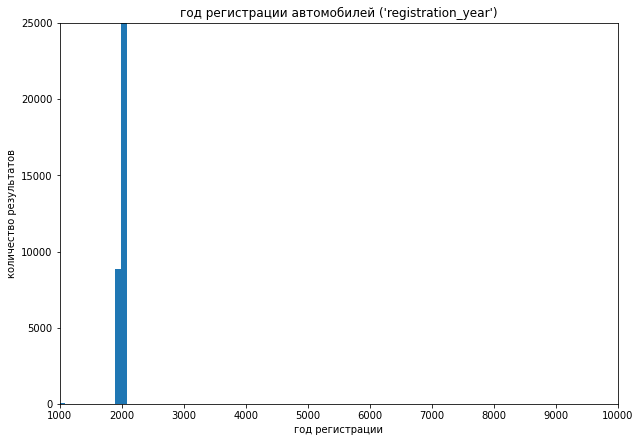

In [ ]:
plt.figure(figsize=[10,7])

plt.hist(data['registration_year'], bins=100)

plt.xlim([1000, 10000])
plt.ylim([0, 25000])

plt.xlabel("год регистрации")
plt.ylabel("количество результатов")

plt.title("год регистрации автомобилей ('registration_year')")
plt.show()

In [ ]:
print('дата последней активности пользователя',data['last_seen'].max())
print('дата создания последней анкеты',data['date_created'].max())

дата последней активности пользователя 2016-04-07 14:58:51
дата создания последней анкеты 2016-04-07 00:00:00


В столбце "год регистрации" много неадекватных данных. Принимаю решение оставить только реалистичный диапазон - 1980-2016 (вижу на гистограмме, что основные данные там. Даже если и возможны авто 1910, их ценообразование другое и в модели они будут мешать. 

In [ ]:
data = data.drop(data[data['registration_year'] < 1980].index).reset_index(drop=True)
print ('после удаления до 1980',data.shape)
print (data.info())

после удаления до 1980 (340427, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340427 entries, 0 to 340426
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        340427 non-null  object
 1   рrice               340427 non-null  int64 
 2   vehicle_type        306986 non-null  object
 3   registration_year   340427 non-null  int64 
 4   gearbox             323666 non-null  object
 5   power               340427 non-null  int64 
 6   model               323658 non-null  object
 7   kilometer           340427 non-null  int64 
 8   registration_month  340427 non-null  int64 
 9   fuel_type           311561 non-null  object
 10  brand               340427 non-null  object
 11  repaired            275490 non-null  object
 12  date_created        340427 non-null  object
 13  number_of_pictures  340427 non-null  int64 
 14  postal_code         340427 non-null  int64 
 15  last_seen      

In [ ]:
data = data.drop(data[data['registration_year'] > 2016].index).reset_index(drop=True)
print ('после удаления после 2016',data.shape)
print (data.info())

после удаления после 2016 (326648, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326648 entries, 0 to 326647
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        326648 non-null  object
 1   рrice               326648 non-null  int64 
 2   vehicle_type        306967 non-null  object
 3   registration_year   326648 non-null  int64 
 4   gearbox             311594 non-null  object
 5   power               326648 non-null  int64 
 6   model               311738 non-null  object
 7   kilometer           326648 non-null  int64 
 8   registration_month  326648 non-null  int64 
 9   fuel_type           303023 non-null  object
 10  brand               326648 non-null  object
 11  repaired            267651 non-null  object
 12  date_created        326648 non-null  object
 13  number_of_pictures  326648 non-null  int64 
 14  postal_code         326648 non-null  int64 
 15  last_seen   

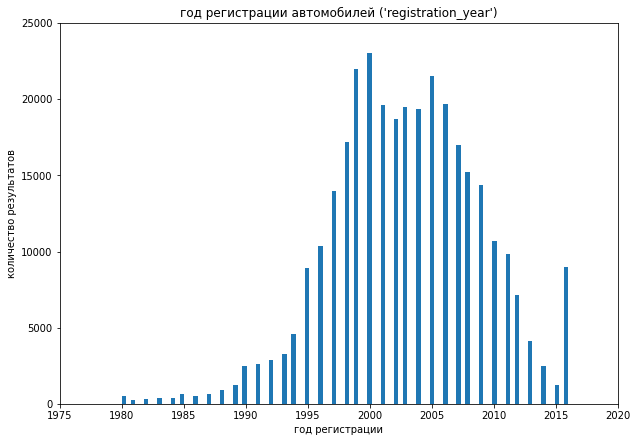

In [ ]:
plt.figure(figsize=[10,7])

plt.hist(data['registration_year'], bins=100)

plt.xlim([1975, 2020])
plt.ylim([0, 25000])

plt.xlabel("год регистрации")
plt.ylabel("количество результатов")

plt.title("год регистрации автомобилей ('registration_year')")
plt.show()

In [ ]:
print(data['power'].unique())
print(data['power'].value_counts())
print('минимальное значение', data['power'].min())
print('максимальное значение', data['power'].max())
print('среднее', data['power'].mean())

[    0   190   163    75    69   102   109   125   101   105   140   115
   131    60   136   160   231    50   118   193    99   113   218   122
   129    70   306    95    61   177   170    55   143   286   232   150
   156    80    82    90   155    54   185    87   180    86    84   224
   235   200   178   265    77   110   144   120   116   184   126   204
    88   194    64   305   197   179   250    45   313    41   165    98
   130   114   211    56   201   213    58   107    83   174   100   220
    73   192    68    66   299    74    52   147   310    71    97    65
   239   203     5   300   103    85   258   320    63    81   148   145
   280   260   104   188   333   186   117   141   132   234   158    39
    92    51   135    59   230    53   209    43   146    67   106   166
   276   344    72   249   237   245   111   326   279   138   175    96
   226    37   301   334   128   133   124    33   219   241   167    94
   182   196   238  1398   228   112    48   272   

 В столбце power много нулевых значений, чего фактически быть не может. Большие значения тоже сомнительные.

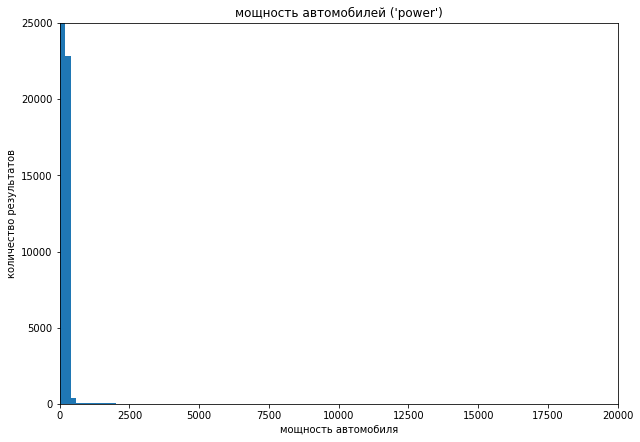

In [ ]:
plt.figure(figsize=[10,7])

plt.hist(data['power'], bins=100)

plt.xlim([0, 20000])
plt.ylim([0, 25000])

plt.xlabel("мощность автомобиля")
plt.ylabel("количество результатов")

plt.title("мощность автомобилей ('power')")
plt.show()

по запросу от Яндекса: "На сегодняшний день самым мощным легковым автомобилем в мире назван Dagger GT компании TranStar Racing LLC... мощность его двигателя превышает 2000 лошадиных сил - 2028 л. с"

план подготовки данных: убрать все нулевые значения, убрать все значения больше 2100.

In [ ]:
data = data.drop(data[data['power'] == 0].index).reset_index(drop=True)
print ('после удаления power = 0',data.shape)
print (data.info())

после удаления power = 0 (294680, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294680 entries, 0 to 294679
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        294680 non-null  object
 1   рrice               294680 non-null  int64 
 2   vehicle_type        283656 non-null  object
 3   registration_year   294680 non-null  int64 
 4   gearbox             289371 non-null  object
 5   power               294680 non-null  int64 
 6   model               283894 non-null  object
 7   kilometer           294680 non-null  int64 
 8   registration_month  294680 non-null  int64 
 9   fuel_type           279186 non-null  object
 10  brand               294680 non-null  object
 11  repaired            252023 non-null  object
 12  date_created        294680 non-null  object
 13  number_of_pictures  294680 non-null  int64 
 14  postal_code         294680 non-null  int64 
 15  last_seen    

In [ ]:
print((323646-298986)/323646*100,'% удаленных значений')

7.61943605049962 % удаленных значений


In [ ]:
data = data.drop(data[data['power'] > 2100].index).reset_index(drop=True)
print ('после удаления power > 2100',data.shape)
print (data.info())

после удаления power > 2100 (294590, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294590 entries, 0 to 294589
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        294590 non-null  object
 1   рrice               294590 non-null  int64 
 2   vehicle_type        283571 non-null  object
 3   registration_year   294590 non-null  int64 
 4   gearbox             289285 non-null  object
 5   power               294590 non-null  int64 
 6   model               283812 non-null  object
 7   kilometer           294590 non-null  int64 
 8   registration_month  294590 non-null  int64 
 9   fuel_type           279113 non-null  object
 10  brand               294590 non-null  object
 11  repaired            251970 non-null  object
 12  date_created        294590 non-null  object
 13  number_of_pictures  294590 non-null  int64 
 14  postal_code         294590 non-null  int64 
 15  last_seen 

In [ ]:
print((298986-298893)/298986*100,'% удаленных значений')

0.031105135357508376 % удаленных значений


In [ ]:
print(data['kilometer'].unique())
print(data['kilometer'].value_counts())


[125000 150000  90000  30000  70000 100000  60000   5000  20000  80000
  50000  40000  10000]
150000    196164
125000     31643
100000     12588
90000      10187
80000       8904
70000       7683
60000       6729
50000       5562
40000       4441
30000       3843
20000       3214
5000        2738
10000        894
Name: kilometer, dtype: int64


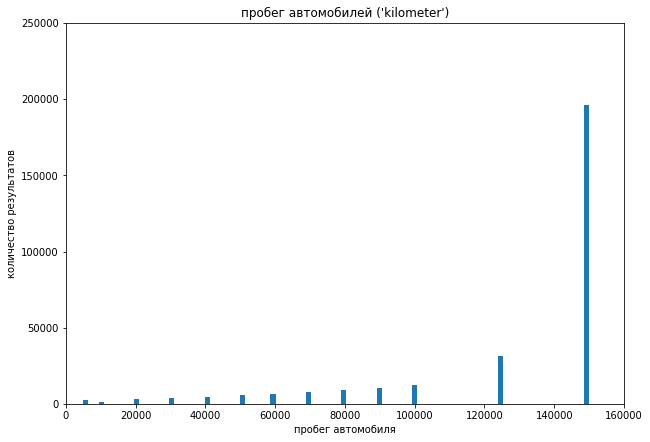

In [ ]:
plt.figure(figsize=[10,7])

plt.hist(data['kilometer'], bins=100)

plt.xlim([0, 160000])
plt.ylim([0, 250000])

plt.xlabel("пробег автомобиля")
plt.ylabel("количество результатов")

plt.title("пробег автомобилей ('kilometer')")
plt.show()

<b> Результат: </b> количественная переменная kilometer собиралась в датасет как дискретная (не по счетчику, а по достижению заданной цифры). Тем не менее данные полные и могут быть использованы в модели.

In [ ]:
print(data['registration_month'].unique())
print(data['registration_month'].value_counts())

[ 5  8  6  7 10  0 12 11  2  3  1  4  9]
3     30227
6     27411
4     25640
5     25506
7     23541
10    22899
12    21206
11    20998
9     20896
1     20042
8     19660
2     18750
0     17814
Name: registration_month, dtype: int64


**Результат**: переменная registration_month может влиять только на стоимость новых автомобилей (в зависимости от гарантийных сроков производителей). Основной массив автомобилей в датасете старше. В связи с этим использовать эти данные в модели не целесообразно.

**Остались без преобразования столбцы**:date_created,number_of_pictures,postal_code - это не характеристики автомобиля как такого, а параметры размещения сервиса по продаже. Влияние этих параметров на цену автомобиля в общем случае не ожидается, поэтому в модель их включать не целесообразно

**некоторые модели могуть работать с категориальными переменными без преобразования. Зафиксируем 2 версии датасета для дальнейшей работы**

In [ ]:
print ('датасет до преобразования категориальных переменных',data.shape)
print (data.info())

датасет до преобразования категориальных переменных (294590, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294590 entries, 0 to 294589
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        294590 non-null  object
 1   рrice               294590 non-null  int64 
 2   vehicle_type        283571 non-null  object
 3   registration_year   294590 non-null  int64 
 4   gearbox             289285 non-null  object
 5   power               294590 non-null  int64 
 6   model               283812 non-null  object
 7   kilometer           294590 non-null  int64 
 8   registration_month  294590 non-null  int64 
 9   fuel_type           279113 non-null  object
 10  brand               294590 non-null  object
 11  repaired            251970 non-null  object
 12  date_created        294590 non-null  object
 13  number_of_pictures  294590 non-null  int64 
 14  postal_code         294590 non-null

In [ ]:
data_cat  = data.copy()
print ('копия датасета, где сохранятся категориальные переменные',data_cat.shape)
print (data_cat.info())

копия датасета, где сохранятся категориальные переменные (294590, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294590 entries, 0 to 294589
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        294590 non-null  object
 1   рrice               294590 non-null  int64 
 2   vehicle_type        283571 non-null  object
 3   registration_year   294590 non-null  int64 
 4   gearbox             289285 non-null  object
 5   power               294590 non-null  int64 
 6   model               283812 non-null  object
 7   kilometer           294590 non-null  int64 
 8   registration_month  294590 non-null  int64 
 9   fuel_type           279113 non-null  object
 10  brand               294590 non-null  object
 11  repaired            251970 non-null  object
 12  date_created        294590 non-null  object
 13  number_of_pictures  294590 non-null  int64 
 14  postal_code         294590 non

**Замена категориальных переменных**

In [ ]:
print(data['vehicle_type'].value_counts())
print(data['vehicle_type'].unique())

sedan          82348
small          69940
wagon          59242
bus            26153
convertible    18450
coupe          14195
suv            10836
other           2407
Name: vehicle_type, dtype: int64
['coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' nan 'other']


<b> Результат: </b> категориальная переменная, но ожидаемо существенная для влияния на цену продажи. 

План подготовки такой: заменить nan на 'other', далее перекодировать на несколько столбцов

In [ ]:
data['vehicle_type']= data['vehicle_type'].fillna('other')
print(data['vehicle_type'].unique())

['coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']


In [ ]:
data = pd.get_dummies(data, columns= ['vehicle_type'])
print(data.head())

          date_crawled  рrice  registration_year gearbox  power  model  \
0  2016-03-24 10:58:45  18300               2011  manual    190    NaN   
1  2016-03-14 12:52:21   9800               2004    auto    163  grand   
2  2016-03-17 16:54:04   1500               2001  manual     75   golf   
3  2016-03-31 17:25:20   3600               2008  manual     69  fabia   
4  2016-04-04 17:36:23    650               1995  manual    102    3er   

   kilometer  registration_month fuel_type       brand  ... postal_code  \
0     125000                   5  gasoline        audi  ...       66954   
1     125000                   8  gasoline        jeep  ...       90480   
2     150000                   6    petrol  volkswagen  ...       91074   
3      90000                   7  gasoline       skoda  ...       60437   
4     150000                  10    petrol         bmw  ...       33775   

             last_seen  vehicle_type_bus  vehicle_type_convertible  \
0  2016-04-07 01:46:50            

In [ ]:
print(data['gearbox'].unique())
print(data['gearbox'].value_counts())
print((340341-323646)/340341*100,'% пропущенных значений')


['manual' 'auto' nan]
manual    230811
auto       58474
Name: gearbox, dtype: int64
4.905374315759782 % пропущенных значений


Коробка передач - важный параметр при выборе автомобиля. Он не может быть не известен. Значит данные неполные. План подготовки такой: убрать строки с nan (меньше 5 %), далее перекодировать на 2 столбца

In [ ]:

data = data.dropna(subset=['gearbox']).reset_index(drop=True)
print ('после удаления nan в gearbox',data.shape)
print(data['gearbox'].unique())
print (data.info())

после удаления nan в gearbox (289285, 23)
['manual' 'auto']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289285 entries, 0 to 289284
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   date_crawled              289285 non-null  object
 1   рrice                     289285 non-null  int64 
 2   registration_year         289285 non-null  int64 
 3   gearbox                   289285 non-null  object
 4   power                     289285 non-null  int64 
 5   model                     279176 non-null  object
 6   kilometer                 289285 non-null  int64 
 7   registration_month        289285 non-null  int64 
 8   fuel_type                 275033 non-null  object
 9   brand                     289285 non-null  object
 10  repaired                  249070 non-null  object
 11  date_created              289285 non-null  object
 12  number_of_pictures        289285 non-null  int64 
 13 

In [ ]:
data = pd.get_dummies(data, columns= ['gearbox'])
print(data.head())

          date_crawled  рrice  registration_year  power  model  kilometer  \
0  2016-03-24 10:58:45  18300               2011    190    NaN     125000   
1  2016-03-14 12:52:21   9800               2004    163  grand     125000   
2  2016-03-17 16:54:04   1500               2001     75   golf     150000   
3  2016-03-31 17:25:20   3600               2008     69  fabia      90000   
4  2016-04-04 17:36:23    650               1995    102    3er     150000   

   registration_month fuel_type       brand repaired  ... vehicle_type_bus  \
0                   5  gasoline        audi      yes  ...                0   
1                   8  gasoline        jeep      NaN  ...                0   
2                   6    petrol  volkswagen       no  ...                0   
3                   7  gasoline       skoda       no  ...                0   
4                  10    petrol         bmw      yes  ...                0   

   vehicle_type_convertible  vehicle_type_coupe vehicle_type_other  

**Результат:** столбец с категориальной переменной gearbox преобразован в 2 числовых. 

In [ ]:
print(data['model'].unique())
print(data['model'].value_counts())

[nan 'grand' 'golf' 'fabia' '3er' '2_reihe' 'c_max' '3_reihe' 'passat'
 'navara' 'twingo' 'a_klasse' 'scirocco' '5er' 'arosa' 'other' 'civic'
 'transporter' 'punto' 'e_klasse' 'clio' 'kadett' 'one' 'fortwo' '1er'
 'b_klasse' 'a8' 'jetta' 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter'
 'astra' '156' 'escort' 'forester' 'xc_reihe' 'scenic' 'a1' 'focus' 'a4'
 'tt' 'a6' 'jazz' 'omega' 'polo' 'slk' '7er' 'combo' 'corsa' '80' '147'
 'z_reihe' 'sorento' 'ibiza' 'mustang' 'eos' 'touran' 'getz' 'insignia'
 'ka' 'almera' 'megane' 'a3' 'lupo' 'r19' 'caddy' 'mondeo' 'cordoba'
 'colt' 'impreza' 'vectra' 'berlingo' 'tiguan' '6_reihe' 'c4' 'panda' 'up'
 'i_reihe' 'ceed' 'kangoo' '5_reihe' 'yeti' 'octavia' 'zafira' 'mii'
 'rx_reihe' '6er' 'modus' 'fox' 'matiz' 'beetle' 'rio' 'touareg' 'logan'
 'spider' 'cuore' 's_max' 'a2' 'galaxy' 'c3' 'viano' 's_klasse' '1_reihe'
 'sharan' 'avensis' 'roomster' 'sl' 'santa' 'leon' 'cooper' '4_reihe' 'a5'
 'sportage' 'laguna' 'ptcruiser' 'clk' 'primera' 'espace' 'exeo'

In [ ]:
data['model']= data['model'].fillna('other')
print(data['model'].unique())

['other' 'grand' 'golf' 'fabia' '3er' '2_reihe' 'c_max' '3_reihe' 'passat'
 'navara' 'twingo' 'a_klasse' 'scirocco' '5er' 'arosa' 'civic'
 'transporter' 'punto' 'e_klasse' 'clio' 'kadett' 'one' 'fortwo' '1er'
 'b_klasse' 'a8' 'jetta' 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter'
 'astra' '156' 'escort' 'forester' 'xc_reihe' 'scenic' 'a1' 'focus' 'a4'
 'tt' 'a6' 'jazz' 'omega' 'polo' 'slk' '7er' 'combo' 'corsa' '80' '147'
 'z_reihe' 'sorento' 'ibiza' 'mustang' 'eos' 'touran' 'getz' 'insignia'
 'ka' 'almera' 'megane' 'a3' 'lupo' 'r19' 'caddy' 'mondeo' 'cordoba'
 'colt' 'impreza' 'vectra' 'berlingo' 'tiguan' '6_reihe' 'c4' 'panda' 'up'
 'i_reihe' 'ceed' 'kangoo' '5_reihe' 'yeti' 'octavia' 'zafira' 'mii'
 'rx_reihe' '6er' 'modus' 'fox' 'matiz' 'beetle' 'rio' 'touareg' 'logan'
 'spider' 'cuore' 's_max' 'a2' 'galaxy' 'c3' 'viano' 's_klasse' '1_reihe'
 'sharan' 'avensis' 'roomster' 'sl' 'santa' 'leon' 'cooper' '4_reihe' 'a5'
 'sportage' 'laguna' 'ptcruiser' 'clk' 'primera' 'espace' 'exeo' '15

In [ ]:
data = pd.get_dummies(data, columns= ['model'])
print(data.head())



          date_crawled  рrice  registration_year  power  kilometer  \
0  2016-03-24 10:58:45  18300               2011    190     125000   
1  2016-03-14 12:52:21   9800               2004    163     125000   
2  2016-03-17 16:54:04   1500               2001     75     150000   
3  2016-03-31 17:25:20   3600               2008     69      90000   
4  2016-04-04 17:36:23    650               1995    102     150000   

   registration_month fuel_type       brand repaired         date_created  \
0                   5  gasoline        audi      yes  2016-03-24 00:00:00   
1                   8  gasoline        jeep      NaN  2016-03-14 00:00:00   
2                   6    petrol  volkswagen       no  2016-03-17 00:00:00   
3                   7  gasoline       skoda       no  2016-03-31 00:00:00   
4                  10    petrol         bmw      yes  2016-04-04 00:00:00   

   ...  model_wrangler  model_x_reihe model_x_trail  model_x_type  \
0  ...               0              0          

<b> Результат: </b> категориальная переменная model преобразована методом One Hot Encoding в набор количественных данных

In [ ]:
print(data['fuel_type'].unique())
print(data['fuel_type'].value_counts())

['gasoline' 'petrol' nan 'lpg' 'other' 'hybrid' 'cng' 'electric']
petrol      182779
gasoline     86817
lpg           4607
cng            478
hybrid         201
other           80
electric        71
Name: fuel_type, dtype: int64


План подготовки данных такой: заменить nan на 'other', трансформировать категории в столбцы с числовыми данными

In [ ]:
data['fuel_type']= data['fuel_type'].fillna('other')
print(data['fuel_type'].unique())

['gasoline' 'petrol' 'other' 'lpg' 'hybrid' 'cng' 'electric']


In [ ]:
data = pd.get_dummies(data, columns= ['fuel_type'])
print(data.head())

          date_crawled  рrice  registration_year  power  kilometer  \
0  2016-03-24 10:58:45  18300               2011    190     125000   
1  2016-03-14 12:52:21   9800               2004    163     125000   
2  2016-03-17 16:54:04   1500               2001     75     150000   
3  2016-03-31 17:25:20   3600               2008     69      90000   
4  2016-04-04 17:36:23    650               1995    102     150000   

   registration_month       brand repaired         date_created  \
0                   5        audi      yes  2016-03-24 00:00:00   
1                   8        jeep      NaN  2016-03-14 00:00:00   
2                   6  volkswagen       no  2016-03-17 00:00:00   
3                   7       skoda       no  2016-03-31 00:00:00   
4                  10         bmw      yes  2016-04-04 00:00:00   

   number_of_pictures  ...  model_ypsilon model_z_reihe  model_zafira  \
0                   0  ...              0             0             0   
1                   0  ...    

<b> Результат: </b> категориальная переменная fuel_type преобразована методом One Hot Encoding в набор количественных данных

In [ ]:
print(data['brand'].unique())
print(data['brand'].value_counts())

['audi' 'jeep' 'volkswagen' 'skoda' 'bmw' 'peugeot' 'ford' 'mazda'
 'nissan' 'renault' 'mercedes_benz' 'seat' 'honda' 'fiat' 'opel' 'mini'
 'smart' 'hyundai' 'sonstige_autos' 'alfa_romeo' 'subaru' 'volvo'
 'mitsubishi' 'kia' 'suzuki' 'lancia' 'citroen' 'toyota' 'chevrolet'
 'dacia' 'daihatsu' 'chrysler' 'jaguar' 'daewoo' 'rover' 'porsche' 'saab'
 'land_rover' 'trabant' 'lada']
volkswagen        62653
bmw               31871
opel              31661
mercedes_benz     26677
audi              25345
ford              20183
renault           13658
peugeot            9245
fiat               7381
seat               5786
skoda              4908
mazda              4666
citroen            4158
nissan             3969
toyota             3957
smart              3799
hyundai            3079
mini               2926
volvo              2751
mitsubishi         2467
honda              2327
kia                2060
suzuki             1935
alfa_romeo         1908
sonstige_autos     1421
chevrolet          1

In [ ]:
data = pd.get_dummies(data, columns= ['brand'])
print(data.head())

          date_crawled  рrice  registration_year  power  kilometer  \
0  2016-03-24 10:58:45  18300               2011    190     125000   
1  2016-03-14 12:52:21   9800               2004    163     125000   
2  2016-03-17 16:54:04   1500               2001     75     150000   
3  2016-03-31 17:25:20   3600               2008     69      90000   
4  2016-04-04 17:36:23    650               1995    102     150000   

   registration_month repaired         date_created  number_of_pictures  \
0                   5      yes  2016-03-24 00:00:00                   0   
1                   8      NaN  2016-03-14 00:00:00                   0   
2                   6       no  2016-03-17 00:00:00                   0   
3                   7       no  2016-03-31 00:00:00                   0   
4                  10      yes  2016-04-04 00:00:00                   0   

   postal_code  ... brand_seat  brand_skoda  brand_smart  \
0        66954  ...          0            0            0   
1       

**Результат**: категориальная переменная brand преобразована методом One Hot Encoding в набор количественных данных

In [ ]:
print(data['repaired'].unique())
print(data['repaired'].value_counts())

['yes' nan 'no']
no     220858
yes     28212
Name: repaired, dtype: int64


In [ ]:
data['repaired']= data['repaired'].fillna('other')
print(data['repaired'].unique())

['yes' 'other' 'no']


In [ ]:
data = pd.get_dummies(data, columns= ['repaired'])
print(data.head())

          date_crawled  рrice  registration_year  power  kilometer  \
0  2016-03-24 10:58:45  18300               2011    190     125000   
1  2016-03-14 12:52:21   9800               2004    163     125000   
2  2016-03-17 16:54:04   1500               2001     75     150000   
3  2016-03-31 17:25:20   3600               2008     69      90000   
4  2016-04-04 17:36:23    650               1995    102     150000   

   registration_month         date_created  number_of_pictures  postal_code  \
0                   5  2016-03-24 00:00:00                   0        66954   
1                   8  2016-03-14 00:00:00                   0        90480   
2                   6  2016-03-17 00:00:00                   0        91074   
3                   7  2016-03-31 00:00:00                   0        60437   
4                  10  2016-04-04 00:00:00                   0        33775   

             last_seen  ...  brand_sonstige_autos  brand_subaru  brand_suzuki  \
0  2016-04-07 01:46:50 

**Результат**: категориальная переменная repaired преобразована методом One Hot Encoding в набор количественных данных

## Обучение моделей

In [ ]:
print('датасет после преобразований',data.shape)




датасет после преобразований (289285, 318)


In [ ]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289285 entries, 0 to 289284
Columns: 318 entries, date_crawled to repaired_yes
dtypes: int64(7), object(3), uint8(308)
memory usage: 107.0+ MB
None


In [ ]:
for column in data:
    print(column)

date_crawled
рrice
registration_year
power
kilometer
registration_month
date_created
number_of_pictures
postal_code
last_seen
vehicle_type_bus
vehicle_type_convertible
vehicle_type_coupe
vehicle_type_other
vehicle_type_sedan
vehicle_type_small
vehicle_type_suv
vehicle_type_wagon
gearbox_auto
gearbox_manual
model_100
model_145
model_147
model_156
model_159
model_1_reihe
model_1er
model_200
model_2_reihe
model_300c
model_3_reihe
model_3er
model_4_reihe
model_500
model_5_reihe
model_5er
model_601
model_6_reihe
model_6er
model_7er
model_80
model_850
model_90
model_900
model_9000
model_911
model_a1
model_a2
model_a3
model_a4
model_a5
model_a6
model_a8
model_a_klasse
model_accord
model_agila
model_alhambra
model_almera
model_altea
model_amarok
model_antara
model_arosa
model_astra
model_auris
model_avensis
model_aveo
model_aygo
model_b_klasse
model_b_max
model_beetle
model_berlingo
model_bora
model_boxster
model_bravo
model_c1
model_c2
model_c3
model_c4
model_c5
model_c_klasse
model_c_max
mod

In [ ]:
features = data.drop(['рrice','date_crawled','registration_month','date_created','number_of_pictures', 'postal_code', 'last_seen' ], axis=1)
target = data['рrice']

In [ ]:
features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size=0.40, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid_test, target_valid_test, test_size=0.50, random_state=12345)
print('features_train shape:', features_train.shape)
print('features_valid shape:', features_valid.shape)
print('features_test shape:', features_test.shape)
print('target_train shape:', target_train.shape)
print('target_valid shape:', target_valid.shape)
print('target_test shape:', target_test.shape)


features_train shape: (173571, 311)
features_valid shape: (57857, 311)
features_test shape: (57857, 311)
target_train shape: (173571,)
target_valid shape: (57857,)
target_test shape: (57857,)


In [ ]:
%%time
model = LinearRegression(normalize=True)
model.fit(features_train,target_train) 


CPU times: user 21.2 s, sys: 19.2 s, total: 40.4 s
Wall time: 40.7 s


LinearRegression(normalize=True)

In [ ]:
%%time
predictions_valid= model.predict(features_valid) 
result = mean_squared_error(target_valid, predictions_valid)**0.5
print("RMSE модели линейной регрессии на валидационной выборке:", result)

RMSE модели линейной регрессии на валидационной выборке: 2543.1275105647856
CPU times: user 137 ms, sys: 139 ms, total: 276 ms
Wall time: 284 ms


**Результат** простая модель линейной регресии не достигла необходимой метрики RMSE меньше 2500

In [ ]:
numeric =[]
for column in features:
    numeric.append(column)
print(numeric)    

['registration_year', 'power', 'kilometer', 'vehicle_type_bus', 'vehicle_type_convertible', 'vehicle_type_coupe', 'vehicle_type_other', 'vehicle_type_sedan', 'vehicle_type_small', 'vehicle_type_suv', 'vehicle_type_wagon', 'gearbox_auto', 'gearbox_manual', 'model_100', 'model_145', 'model_147', 'model_156', 'model_159', 'model_1_reihe', 'model_1er', 'model_200', 'model_2_reihe', 'model_300c', 'model_3_reihe', 'model_3er', 'model_4_reihe', 'model_500', 'model_5_reihe', 'model_5er', 'model_601', 'model_6_reihe', 'model_6er', 'model_7er', 'model_80', 'model_850', 'model_90', 'model_900', 'model_9000', 'model_911', 'model_a1', 'model_a2', 'model_a3', 'model_a4', 'model_a5', 'model_a6', 'model_a8', 'model_a_klasse', 'model_accord', 'model_agila', 'model_alhambra', 'model_almera', 'model_altea', 'model_amarok', 'model_antara', 'model_arosa', 'model_astra', 'model_auris', 'model_avensis', 'model_aveo', 'model_aygo', 'model_b_klasse', 'model_b_max', 'model_beetle', 'model_berlingo', 'model_bora

In [ ]:
%%time
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric]= scaler.transform(features_valid[numeric])
features_test[numeric]= scaler.transform(features_test[numeric])
pd.options.mode.chained_assignment = None
print(features_train) 


<timed exec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<timed exec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

        registration_year     power  kilometer  vehicle_type_bus  \
87754           -0.688672 -0.744338  -0.098564         -0.313329   
180694           0.669237 -0.425190   0.587093         -0.313329   
97784           -0.858411  0.005660   0.587093         -0.313329   
8766             0.499498 -0.201787   0.587093         -0.313329   
168414           1.178453  0.229063   0.587093         -0.313329   
...                   ...       ...        ...               ...   
158838          -3.743967 -0.265616   0.587093         -0.313329   
47873           -1.197888  0.292893   0.587093          3.191530   
86398            1.687669  0.771615  -2.155533         -0.313329   
77285            0.160021  0.771615   0.587093         -0.313329   
217570           1.008714 -0.026255  -1.332745         -0.313329   

        vehicle_type_convertible  vehicle_type_coupe  vehicle_type_other  \
87754                  -0.257803           -0.224793           -0.208858   
180694                 -0.25780

In [ ]:
%%time
model = LinearRegression(normalize=True)
model.fit(features_train,target_train) 

CPU times: user 17.8 s, sys: 14.8 s, total: 32.6 s
Wall time: 32.6 s


LinearRegression(normalize=True)

In [ ]:
%%time
predictions_valid= model.predict(features_valid) 
result = mean_squared_error(target_valid, predictions_valid)**0.5
print("RMSE модели линейной регрессии на валидационной выборке:", result)

RMSE модели линейной регрессии на валидационной выборке: 2542.9446961718
CPU times: user 82.2 ms, sys: 86.9 ms, total: 169 ms
Wall time: 190 ms


In [ ]:
%%time
best_mod = None
best_res = 3000
best_dep = 0
for depth in range(2, 10, 2):
    for est in range(5, 50, 5):
        model = RandomForestRegressor(n_estimators=est, 
        max_depth=depth, random_state=12345) 
        print(model)
        print('время обучения модели')
        %timeit model.fit(features_train, target_train)
        print('время предсказания')
        %timeit model.predict(features_valid)
        preditions_forest = model.predict(features_valid) 
        res_forest = mean_squared_error(target_valid, preditions_forest)**0.5
        print("RMSE модели случайного леса на валидационной выборке:", res_forest)
        if res_forest < best_res:
            best_mod = model
            best_res = res_forest
            best_deр = depth
print('Cамая эффективная модель - best_mod',best_mod)
print("RMSE наилучшей модели:", best_res)

**но от добавления счетчиков внутри цикла общий Wall time стал 2h 25min 32s!!!!** 

**Результат** модель случайного леса с перебором гиперпараметров достигает необходимой метрики RMSE меньше 2500, best_mod RandomForestRegressor(max_depth=8, n_estimators=45, random_state=12345)
RMSE наилучшей модели: 1997.83  Wall time: 15min 5s

In [ ]:
%%time

best_model = None
best_result = 3000
best_depth = 0
for depth in range(1, 50):
    model = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    print(model)
    %timeit model.fit(features_train, target_train)
    print('время обучения модели')
    %timeit model.predict(features_valid)
    predictions_valid= model.predict(features_valid)
    print('время предсказания')
    result_tree = mean_squared_error(target_valid, predictions_valid)**0.5
    print("RMSE модели дерева решений на валидационной выборке:", result_tree)
    if result_tree < best_result:
            best_model = model
            best_result = result_tree
            best_deрth = depth
print('Cамая эффективная модель - best_mod',best_model)
print("RMSE наилучшей модели:", best_result)

После добавления счетчиков Wall time всей ячейки стал  32min 51s 

**Результат** модель дерева решений с перебором гиперпараметров достигает необходимой метрики RMSE меньше 2500, best_mod DecisionTreeRegressor(max_depth=19, random_state=12345)
RMSE наилучшей модели: 1805.46, Wall time: 3min 6s

**Попробуем модели, которые могут работоть с датасетами содержащими категориальные переменные**

In [ ]:
for column in data_cat:
    print(column)

date_crawled
рrice
vehicle_type
registration_year
gearbox
power
model
kilometer
registration_month
fuel_type
brand
repaired
date_created
number_of_pictures
postal_code
last_seen


In [ ]:
data_good_cat=data_cat.drop(['date_crawled','registration_month','date_created','number_of_pictures', 'postal_code', 'last_seen'], axis=1)

In [ ]:
print(data_good_cat.shape)
print(data_good_cat.info())

(294590, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294590 entries, 0 to 294589
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   рrice              294590 non-null  int64 
 1   vehicle_type       283571 non-null  object
 2   registration_year  294590 non-null  int64 
 3   gearbox            289285 non-null  object
 4   power              294590 non-null  int64 
 5   model              283812 non-null  object
 6   kilometer          294590 non-null  int64 
 7   fuel_type          279113 non-null  object
 8   brand              294590 non-null  object
 9   repaired           251970 non-null  object
dtypes: int64(4), object(6)
memory usage: 22.5+ MB
None


In [ ]:
print(data_good_cat.isna().sum()) 

рrice                    0
vehicle_type         11019
registration_year        0
gearbox               5305
power                    0
model                10778
kilometer                0
fuel_type            15477
brand                    0
repaired             42620
dtype: int64


In [ ]:
data_good_cat['vehicle_type']= data_good_cat['vehicle_type'].fillna('other')
print(data_good_cat['vehicle_type'].unique())

['coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']


In [ ]:
print(data_good_cat['gearbox'].unique())
data_good_cat['gearbox']= data_good_cat['gearbox'].fillna('other')
print(data_good_cat['gearbox'].unique())

['manual' 'auto' nan]
['manual' 'auto' 'other']


In [ ]:
data_good_cat['model']= data_good_cat['model'].fillna('other')
print(data_good_cat['model'].unique())

['other' 'grand' 'golf' 'fabia' '3er' '2_reihe' 'c_max' '3_reihe' 'passat'
 'navara' 'polo' 'twingo' 'a_klasse' 'scirocco' '5er' 'arosa' 'civic'
 'transporter' 'punto' 'e_klasse' 'clio' 'kadett' 'one' 'fortwo' '1er'
 'b_klasse' 'a8' 'jetta' 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter'
 'astra' '156' 'escort' 'forester' 'xc_reihe' 'scenic' 'ka' 'a1' 'focus'
 'a4' 'tt' 'a6' 'jazz' 'omega' 'slk' '7er' 'combo' 'corsa' '80' '147'
 'z_reihe' 'sorento' 'ibiza' 'mustang' 'eos' 'touran' 'getz' 'insignia'
 'almera' 'megane' 'a3' 'lupo' 'r19' 'caddy' 'mondeo' 'cordoba' 'colt'
 'impreza' 'vectra' 'berlingo' 'tiguan' '6_reihe' 'c4' 'panda' 'up'
 'i_reihe' 'ceed' 'kangoo' '5_reihe' 'yeti' 'octavia' 'zafira' 'mii'
 'rx_reihe' '6er' 'modus' 'fox' 'matiz' 'beetle' 'rio' 'touareg' 'logan'
 'spider' 'cuore' 's_max' 'a2' 'galaxy' 'c3' 'viano' 's_klasse' '1_reihe'
 'sharan' 'avensis' 'roomster' 'sl' 'santa' 'leon' 'cooper' '4_reihe' 'a5'
 'sportage' 'laguna' 'ptcruiser' 'clk' 'primera' 'espace' 'exeo' '15

In [ ]:
data_good_cat['fuel_type']= data_good_cat['fuel_type'].fillna('other')
print(data_good_cat['fuel_type'].unique())

In [ ]:
data_good_cat['repaired']= data_good_cat['repaired'].fillna('other')
print(data_good_cat['repaired'].unique())

In [ ]:
print(data_good_cat.isna().sum()) 

In [ ]:
features_train_cat, features_valid_test_cat, target_train_cat, target_valid_test_cat = train_test_split(
    data_good_cat.drop('рrice',axis=1), data_good_cat.рrice, test_size=0.40, random_state=12345)
features_valid_cat, features_test_cat, target_valid_cat, target_test_cat = train_test_split(
    features_valid_test_cat, target_valid_test_cat, test_size=0.50, random_state=12345)
print('features_train_cat shape:', features_train_cat.shape)
print('features_valid_cat shape:', features_valid_cat.shape)
print('features_test_cat shape:', features_test_cat.shape)
print('target_train_cat shape:', target_train_cat.shape)
print('target_valid_cat shape:', target_valid_cat.shape)
print('target_test_cat shape:', target_test_cat.shape)


In [ ]:
%%time

cat_features = ['vehicle_type', 'gearbox',
                'model', 'kilometer','fuel_type', 'brand', 'repaired']

model = CatBoostRegressor(loss_function="RMSE", iterations=150) 

model.fit(features_train_cat, target_train_cat, cat_features=cat_features)
print('время обучения модели')


In [ ]:
%%time
pred_valid = model.predict(features_valid_cat)
print('время предсказания')
result_cat = mean_squared_error(target_valid_cat, pred_valid)**0.5
print("RMSE cat на валидационной выборке:", result_cat)

**Результат** модель CatBoost достигает необходимой метрики RMSE меньше 2500, RMSE на валидационной выборке: 1614.37 Wall time обучения 13.2 s предсказания 99 ms

In [ ]:
%%time

cat_features = ['vehicle_type', 'gearbox',
                'model', 'fuel_type', 'brand', 'repaired']

model = CatBoostRegressor(loss_function="RMSE", iterations=150) 

model.fit(features_train_cat, target_train_cat, cat_features=cat_features)
print('время обучения модели')


In [ ]:
%%time
pred_valid = model.predict(features_valid_cat) 
print('время предсказания')
result_cat2 = mean_squared_error(target_valid_cat, pred_valid)**0.5
print("RMSE cat на валидационной выборке:", result_cat2)

Результат модель CatBoost достигает необходимой метрики RMSE меньше 2500, RMSE на валидационной выборке: 1610.28 Wall time обучения 11.6 s предсказания 75.1 ms

Второй вариант удачнее по метрике и по времени

In [ ]:
data_light= data_good_cat.copy()
print(data_light.shape)
print(data_light.info())

Для работы с LGBMRegressor требуется преобразовать формат столбцов object в  category

In [ ]:
cols_to_change =['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'repaired']
for col in cols_to_change:
    data_light[col] = data_light[col].astype('category')

print(data_light.shape)
print(data_light.info())


In [ ]:
features_train_light, features_valid_test_light, target_train_light, target_valid_test_light = train_test_split(
    data_light.drop('рrice',axis=1), data_light.рrice, test_size=0.40, random_state=12345)
features_valid_light, features_test_light, target_valid_light, target_test_light = train_test_split(
    features_valid_test_light, target_valid_test_light, test_size=0.50, random_state=12345)
print('features_train_light shape:', features_train_light.shape)
print('features_valid_light shape:', features_valid_light.shape)
print('features_test_light shape:', features_test_light.shape)
print('target_train_light shape:', target_train_light.shape)
print('target_valid_light shape:', target_valid_light.shape)
print('target_test_light shape:', target_test_light.shape)

In [ ]:
%%time
model = ltb.LGBMRegressor()
model.fit(features_train_light, target_train_light)
print('время обучения модели')
print(model)
expected_y  = target_valid_light


In [ ]:
%%time
predicted_y = model.predict(features_valid_light)
print('время предсказания')
result_ltb = mean_squared_error(expected_y, predicted_y)**0.5
print("RMSE ltb.LGBMRegressor на валидационной выборке:", result_ltb)


**Результат** модель LGBMRegressor достигает необходимой метрики RMSE меньше 2500, RMSE на валидационной выборке: 1537.84 Wall time обучения 41.7 s, предсказания 705 ms

## Анализ моделей

In [ ]:

print('модель случайный лес с перебором гиперпараметров')
print('Cамая эффективная модель - best_mod',best_mod)
print("RMSE наилучшей модели:", best_res)
print ('Wall time: 15min 5s (без счетчиков внутри цикла)')
print()
print()
print('модель дерево решений с перебором гиперпараметров')
print('Cамая эффективная модель - best_mod',best_model)
print("RMSE наилучшей модели:", best_result)
print ('Wall time: 3min 6s (без счетчиков внутри цикла)')
print()
print()
print('модель CatBoostRegressor вариант 1')
print(result_cat)
print ('Wall time обучения 13.2 s предсказания 99 ms')
print()
print()
print('модель CatBoostRegressor вариант 2')
print(result_cat2)
print ('Wall time обучения 11.6 s предсказания 75.1 ms ')
print()
print()
print('модель LGBMRegressor')
print(result_ltb)
print ('Wall time: Wall time обучения 41.7 s, предсказания 705 ms')

По результатам обучения 4 модели достигают необходимой метрики RMSE меньше 2500
- **Работающие только с числовыми данными:**
- модель случайного леса с перебором гиперпараметров, самый эффективный вариант best_mod RandomForestRegressor(max_depth=8, n_estimators=45, random_state=12345)
RMSE наилучшей модели: 1997.83
Wall time: 15min 5s
- модель дерева решений с перебором гиперпараметров, самый эффективный вариант best_mod DecisionTreeRegressor(max_depth=19, random_state=12345)
RMSE наилучшей модели: 1805.46
Wall time: 3min 6s
- **Работающие непосредственно с категориальными данными:**
- модель CatBoost достигает необходимой метрики, RMSE 1610.2868196166744
Wall time обучения 11.6 s предсказания 75.1 ms
- модель LGBMRegressor достигает необходимой метрики, RMSE на валидационной выборке: 1571.977953169544
Wall time: Wall time обучения 41.7 s, предсказания 705 ms

**По условиям задания** 
Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

По этим критериям эффективнее оказались модели работающие непосредственно с категориальными переменными:
- качество предсказания: LGBMRegressor;
- скорость предсказания: CatBoostRegressor;
- время обучения: CatBoostRegressor.  

По сумме критериев выбираю CatBoostRegressor - скорость существенно выше, при это метрики незначительно уступают LGBMRegressor 

Попробуем на тестовой выборке выбранную модель. Поскольку все эти модели работают с разными модификациями датасета, вызовем их справочно на печать.

In [ ]:
print('features_train_cat shape:', features_train_cat.shape)
print('features_valid_cat shape:', features_valid_cat.shape)
print('features_test_cat shape:', features_test_cat.shape)
print('target_train_cat shape:', target_train_cat.shape)
print('target_valid_cat shape:', target_valid_cat.shape)
print('target_test_cat shape:', target_test_cat.shape)


In [ ]:
%%time

cat_features = ['vehicle_type', 'gearbox',
               'model', 'fuel_type', 'brand', 'repaired']

model = CatBoostRegressor(loss_function="RMSE", iterations=150) 

model.fit(features_train_cat, target_train_cat, cat_features=cat_features)
print('время обучения модели')


In [ ]:
%%time
pred_test = model.predict(features_test_cat)
print('время предсказания')
result_cat_test = mean_squared_error(target_test_cat, pred_test)**0.5
print("RMSE cat на тестовой выборке:", result_cat_test)

**Результат** модель CatBoostRegressor достигает необходимой метрики RMSE меньше 2500, RMSE на тестовой выборке: 1609.32, Wall time обучения 10.9 s предсказания 88.9 ms

**Общие выводы** из рассмотренных моделей для предсказания цены автомобиля оказалась самой удобной и эффективной модель CatBoostRegressor
- качество предсказания - существенно лучше критериев менее 2500;
- скорость предсказания - минимальная;
- время обучения - минимальное;
- также эта модель удобна с точки зрения сокращения времени предобработки данных.